In [1]:
import uproot
import pyxrootd
import matplotlib.pyplot as plt
import numpy, sys

In [2]:

# Newlocation    = "/store/user/lpctop/TTGamma_FullRun2/AnalysisNtuples/2016/"
# OldlocationEle = "/store/user/aldas/NanoAOD/TTGamma_16/13TeV_AnalysisNtuples/electrons/"
# OldlocationMu  = "/store/user/aldas/NanoAOD/TTGamma_16/13TeV_AnalysisNtuples/muons/"
# SingleEle     = ["Data_SingleEle_b_2016_AnalysisNtuple.root","Data_SingleEle_c_2016_AnalysisNtuple.root","Data_SingleEle_d_2016_AnalysisNtuple.root","Data_SingleEle_e_2016_AnalysisNtuple.root","Data_SingleEle_f_2016_AnalysisNtuple.root","Data_SingleEle_g_2016_AnalysisNtuple.root","Data_SingleEle_h_2016_AnalysisNtuple.root"]
# SingleMu      = ["Data_SingleMu_b_2016_AnalysisNtuple.root","Data_SingleMu_c_2016_AnalysisNtuple.root","Data_SingleMu_d_2016_AnalysisNtuple.root","Data_SingleMu_e_2016_AnalysisNtuple.root","Data_SingleMu_f_2016_AnalysisNtuple.root","Data_SingleMu_g_2016_AnalysisNtuple.root","Data_SingleMu_h_2016_AnalysisNtuple.root"]
# eroot              = "root://cmseos.fnal.gov/"

Newlocation    = "/store/user/lpctop/TTGamma_FullRun2/AnalysisNtuples/2017/"
OldlocationEle = "/store/user/aldas/NanoAOD/TTGamma_17/13TeV_AnalysisNtuples/electrons/"
OldlocationMu  = "/store/user/aldas/NanoAOD/TTGamma_17/13TeV_AnalysisNtuples/muons/"
SingleEle     = ["Data_SingleEle_b_2017_AnalysisNtuple.root","Data_SingleEle_c_2017_AnalysisNtuple.root","Data_SingleEle_d_2017_AnalysisNtuple.root","Data_SingleEle_e_2017_AnalysisNtuple.root","Data_SingleEle_f_2017_AnalysisNtuple.root"]
SingleMu      = ["Data_SingleMu_b_2017_AnalysisNtuple.root","Data_SingleMu_c_2017_AnalysisNtuple.root","Data_SingleMu_d_2017_AnalysisNtuple.root","Data_SingleMu_e_2017_AnalysisNtuple.root","Data_SingleMu_f_2017_AnalysisNtuple.root"]
eroot              = "root://cmseos.fnal.gov/"



# Newlocation    = "/store/user/lpctop/TTGamma_FullRun2/AnalysisNtuples/2018/"
# OldlocationEle = "/store/user/aldas/NanoAOD/TTGamma_18/13TeV_AnalysisNtuples/electrons/"
# OldlocationMu  = "/store/user/aldas/NanoAOD/TTGamma_18/13TeV_AnalysisNtuples/muons/"
# SingleEle     = ["Data_SingleEle_a_2018_AnalysisNtuple.root","Data_SingleEle_b_2018_AnalysisNtuple.root","Data_SingleEle_c_2018_AnalysisNtuple.root","Data_SingleEle_d_2018_AnalysisNtuple.root"]
# SingleMu      = ["Data_SingleMu_a_2018_AnalysisNtuple.root","Data_SingleMu_b_2018_AnalysisNtuple.root","Data_SingleMu_c_2018_AnalysisNtuple.root","Data_SingleMu_d_2018_AnalysisNtuple.root"]
# eroot              = "root://cmseos.fnal.gov/"


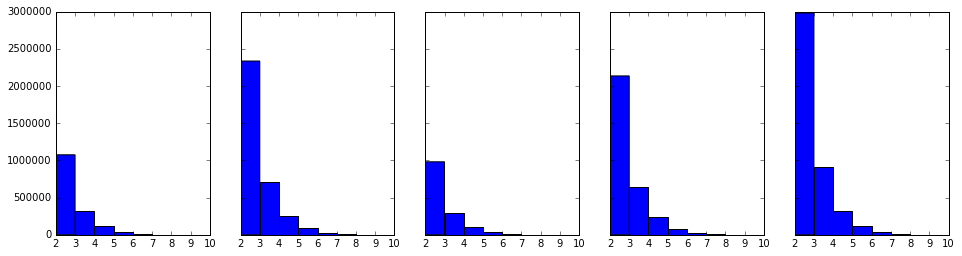

In [3]:
fig, axs = plt.subplots(1, len(SingleEle), sharey=True,figsize = (16,4))
index =-1
allXNew = []
for f in SingleEle:
    index +=1
    fileName = Newlocation + f
#     print fileName
    mytree = uproot.open(eroot+fileName)["AnalysisTree"]
    lepSel  = (mytree.array('nEle')==1)
    jetSel  = (mytree.array('nJet')>=2) & lepSel
    bjetSel = (mytree.array('nBJet')>=0) & jetSel
    Njets   = numpy.array(mytree.array('nJet')[bjetSel])
    x = axs[index].hist(Njets,bins=8,range=(2,10))
    allXNew.append(list(x[0])) # x[0] is array of each bin content in a histogram 


# for ax in axs:
#     ax.grid(True)
#     ax.set_xlabel("NJets")
#     ax.set_ylabel("Events")



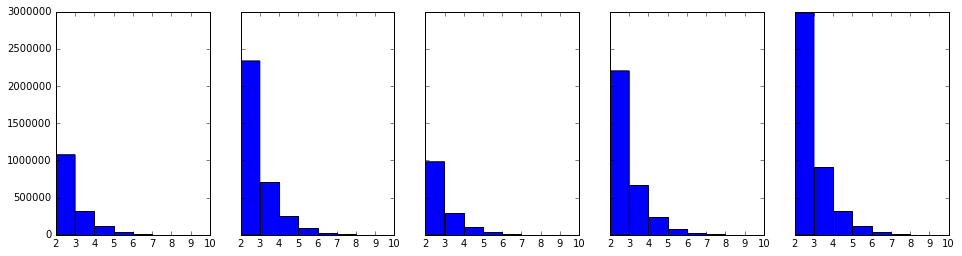

In [4]:
fig, axs = plt.subplots(1, len(SingleEle), sharey=True,figsize = (16,4))
index =-1
allXOld = []
for f in SingleEle:
    index +=1
    fileName = OldlocationEle + f
#     print fileName
    mytree = uproot.open(eroot+fileName)["AnalysisTree"]
    lepSel  = (mytree.array('nEle')==1)
    jetSel  = (mytree.array('nJet')>=2) & lepSel
    bjetSel = (mytree.array('nBJet')>=0) & jetSel
    Njets   = numpy.array(mytree.array('nJet')[bjetSel])
    x = axs[index].hist(Njets,bins=8,range=(2,10))
    allXOld.append(list(x[0])) # x[0] is array of each bin content in a histogram 

# for ax in axs:
#     ax.grid(True)
#     ax.set_xlabel("NJets")
#     ax.set_ylabel("Events Ratio")


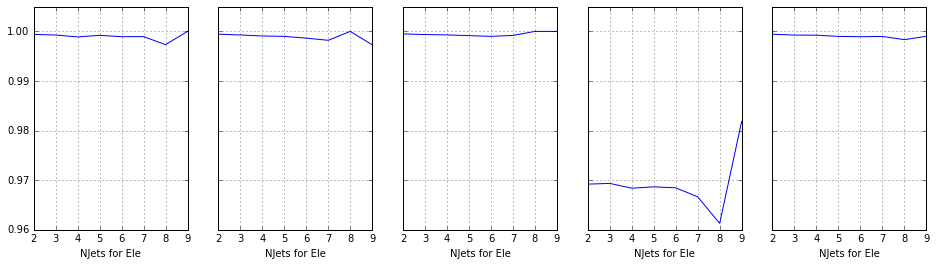

In [5]:
xcord = [2,3,4,5,6,7,8,9]
ratio = [[n/d if d else 0 for n, d in zip(subq, subr)] for subq, subr in zip(allXNew, allXOld)]
fig, axs = plt.subplots(1, len(SingleMu), sharey=True,figsize = (16,4))
for i in xrange(0,len(axs)):
#     print ratio[i]
    axs[i].plot(xcord,ratio[i])
    axs[i].grid(True)
    axs[i].set_xlabel("NJets for Ele")
#     axs[i].set_ylabel("Events Ratio")



[[1771737.0, 519904.0, 188590.0, 66217.0, 21580.0, 6256.0, 1787.0, 554.0], [3536596.0, 1038719.0, 377815.0, 131956.0, 41985.0, 12296.0, 3320.0, 1085.0], [1493698.0, 438786.0, 159527.0, 55764.0, 17904.0, 5197.0, 1405.0, 469.0], [3498349.0, 1022950.0, 366436.0, 128628.0, 41110.0, 12190.0, 3403.0, 1120.0], [5321364.0, 1546315.0, 541209.0, 187372.0, 60049.0, 17852.0, 4902.0, 1657.0]]


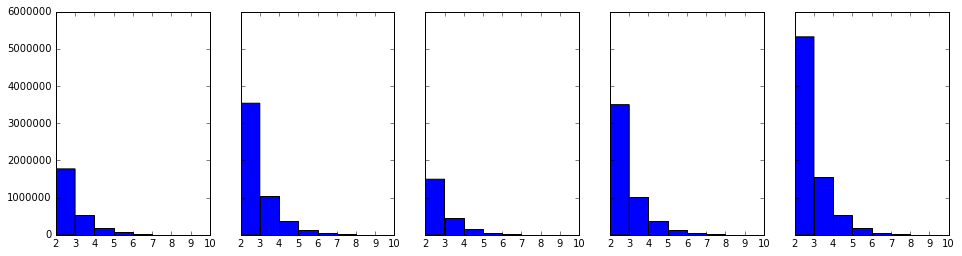

In [6]:
fig, axs = plt.subplots(1, len(SingleMu), sharey=True,figsize = (16,4))
index =-1
allXNew =[]
for f in SingleMu:
    index +=1
    fileName = Newlocation + f
#     print fileName
    mytree = uproot.open(eroot+fileName)["AnalysisTree"]
    lepSel  = (mytree.array('nMu')==1)
    jetSel  = (mytree.array('nJet')>=2) & lepSel
    bjetSel = (mytree.array('nBJet')>=0) & jetSel
    Njets   = numpy.array(mytree.array('nJet')[bjetSel])
    x = axs[index].hist(Njets,bins=8,range=(2,10))
    allXNew.append(list(x[0])) # x[0] is array of each bin content in a histogram
# for ax in axs:
#     ax.grid(True)
#     ax.set_xlabel("NJets")
#     ax.set_ylabel("Events")
print allXNew

[[1772830.0, 520303.0, 188729.0, 66269.0, 21598.0, 6265.0, 1789.0, 556.0], [3538590.0, 1039433.0, 378113.0, 132099.0, 42036.0, 12311.0, 3323.0, 1086.0], [1494426.0, 439050.0, 159635.0, 55816.0, 17914.0, 5205.0, 1407.0, 469.0], [3500191.0, 1023570.0, 366705.0, 128730.0, 41145.0, 12206.0, 3404.0, 1123.0], [5324293.0, 1547373.0, 541617.0, 187556.0, 60126.0, 17868.0, 4907.0, 1658.0]]


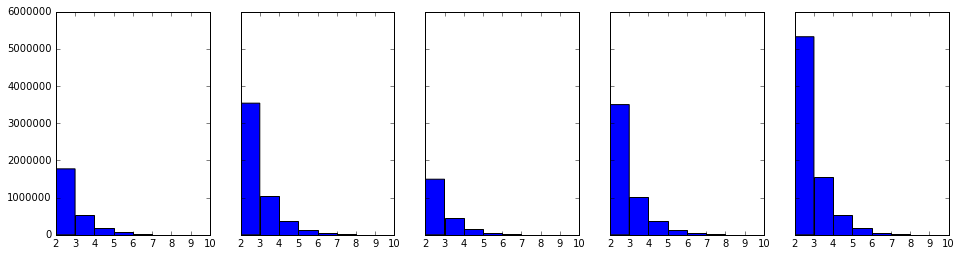

In [7]:
fig, axs = plt.subplots(1, len(SingleMu), sharey=True,figsize = (16,4))
index =-1
allXOld=[]
for f in SingleMu:
    index +=1
    fileName = OldlocationMu + f
#     print fileName
    mytree = uproot.open(eroot+fileName)["AnalysisTree"]
    lepSel  = (mytree.array('nMu')==1)
    jetSel  = (mytree.array('nJet')>=2) & lepSel
    bjetSel = (mytree.array('nBJet')>=0) & jetSel
    Njets   = numpy.array(mytree.array('nJet')[bjetSel])
    x = axs[index].hist(Njets,bins=8,range=(2,10))
    allXOld.append(list(x[0])) # x[0] is array of each bin content in a histogram
# for ax in axs:
#     ax.grid(True)
#     ax.set_xlabel("NJets")
#     ax.set_ylabel("Events")
print allXOld

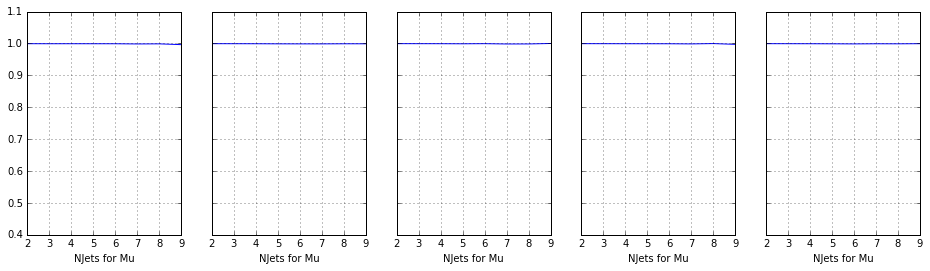

In [8]:
xcord = [2,3,4,5,6,7,8,9]
ratio = [[n/d if d else 0 for n, d in zip(subq, subr)] for subq, subr in zip(allXNew, allXOld)]
fig, axs = plt.subplots(1, len(SingleMu), sharey=True,figsize = (16,4))
for i in xrange(0,len(axs)):
#     print ratio[i]
    axs[i].plot(xcord,ratio[i])
    axs[i].grid(True)
    axs[i].set_xlabel("NJets for Mu")
    axs[i].set_ylim(0.4, 1.1)